## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 52.1ms	remaining: 52s
1:	learn: 0.9301086	total: 55.6ms	remaining: 27.7s
2:	learn: 0.9005637	total: 59.3ms	remaining: 19.7s
3:	learn: 0.8720983	total: 62.9ms	remaining: 15.7s
4:	learn: 0.8467410	total: 65.8ms	remaining: 13.1s
5:	learn: 0.8226672	total: 68.6ms	remaining: 11.4s
6:	learn: 0.7994702	total: 71.5ms	remaining: 10.1s
7:	learn: 0.7784272	total: 74.5ms	remaining: 9.24s
8:	learn: 0.7602192	total: 78.6ms	remaining: 8.66s
9:	learn: 0.7412421	total: 81.8ms	remaining: 8.1s
10:	learn: 0.7247930	total: 84.5ms	remaining: 7.6s
11:	learn: 0.7089951	total: 87.4ms	remaining: 7.19s
12:	learn: 0.6951345	total: 90.3ms	remaining: 6.86s
13:	learn: 0.6809276	total: 93.3ms	remaining: 6.57s
14:	learn: 0.6692630	total: 96.3ms	remaining: 6.32s
15:	learn: 0.6588323	total: 100ms	remaining: 6.15s
16:	learn: 0.6472700	total: 103ms	remaining: 5.94s
17:	learn: 0.6379982	total: 106ms	remaining: 5.77s
18:	learn: 0.6294674	total: 109ms	remaining: 5.65s


43:	learn: 0.5116444	total: 186ms	remaining: 4.03s
44:	learn: 0.5100547	total: 188ms	remaining: 4s
45:	learn: 0.5069096	total: 191ms	remaining: 3.96s
46:	learn: 0.5051685	total: 194ms	remaining: 3.93s
47:	learn: 0.5033968	total: 197ms	remaining: 3.9s
48:	learn: 0.5012433	total: 199ms	remaining: 3.87s
49:	learn: 0.4986132	total: 204ms	remaining: 3.87s
50:	learn: 0.4968022	total: 206ms	remaining: 3.84s
51:	learn: 0.4951632	total: 209ms	remaining: 3.81s
52:	learn: 0.4928924	total: 212ms	remaining: 3.79s
53:	learn: 0.4917272	total: 215ms	remaining: 3.76s
54:	learn: 0.4895079	total: 217ms	remaining: 3.73s
55:	learn: 0.4881884	total: 220ms	remaining: 3.71s
56:	learn: 0.4861566	total: 223ms	remaining: 3.69s
57:	learn: 0.4850201	total: 226ms	remaining: 3.66s
58:	learn: 0.4840055	total: 230ms	remaining: 3.67s
59:	learn: 0.4824455	total: 233ms	remaining: 3.65s
60:	learn: 0.4809744	total: 236ms	remaining: 3.63s
61:	learn: 0.4801376	total: 239ms	remaining: 3.61s
62:	learn: 0.4792422	total: 242ms	r

106:	learn: 0.4451085	total: 376ms	remaining: 3.14s
107:	learn: 0.4447909	total: 379ms	remaining: 3.13s
108:	learn: 0.4440936	total: 382ms	remaining: 3.12s
109:	learn: 0.4435519	total: 385ms	remaining: 3.12s
110:	learn: 0.4431075	total: 388ms	remaining: 3.11s
111:	learn: 0.4425498	total: 391ms	remaining: 3.1s
112:	learn: 0.4419106	total: 393ms	remaining: 3.09s
113:	learn: 0.4414425	total: 396ms	remaining: 3.08s
114:	learn: 0.4407446	total: 399ms	remaining: 3.07s
115:	learn: 0.4402011	total: 402ms	remaining: 3.06s
116:	learn: 0.4398559	total: 406ms	remaining: 3.06s
117:	learn: 0.4392990	total: 409ms	remaining: 3.06s
118:	learn: 0.4389153	total: 412ms	remaining: 3.05s
119:	learn: 0.4383331	total: 415ms	remaining: 3.04s
120:	learn: 0.4378136	total: 417ms	remaining: 3.03s
121:	learn: 0.4375553	total: 420ms	remaining: 3.02s
122:	learn: 0.4369995	total: 423ms	remaining: 3.02s
123:	learn: 0.4366325	total: 427ms	remaining: 3.01s
124:	learn: 0.4362823	total: 431ms	remaining: 3.02s
125:	learn: 0

169:	learn: 0.4165960	total: 566ms	remaining: 2.77s
170:	learn: 0.4161870	total: 569ms	remaining: 2.76s
171:	learn: 0.4156228	total: 572ms	remaining: 2.75s
172:	learn: 0.4153041	total: 575ms	remaining: 2.75s
173:	learn: 0.4148857	total: 577ms	remaining: 2.74s
174:	learn: 0.4144190	total: 580ms	remaining: 2.73s
175:	learn: 0.4140875	total: 583ms	remaining: 2.73s
176:	learn: 0.4136755	total: 586ms	remaining: 2.72s
177:	learn: 0.4133860	total: 588ms	remaining: 2.72s
178:	learn: 0.4129780	total: 591ms	remaining: 2.71s
179:	learn: 0.4122907	total: 594ms	remaining: 2.71s
180:	learn: 0.4119188	total: 597ms	remaining: 2.7s
181:	learn: 0.4115412	total: 600ms	remaining: 2.7s
182:	learn: 0.4112620	total: 603ms	remaining: 2.69s
183:	learn: 0.4107734	total: 606ms	remaining: 2.69s
184:	learn: 0.4104881	total: 608ms	remaining: 2.68s
185:	learn: 0.4100009	total: 611ms	remaining: 2.67s
186:	learn: 0.4096453	total: 615ms	remaining: 2.67s
187:	learn: 0.4093395	total: 618ms	remaining: 2.67s
188:	learn: 0.

232:	learn: 0.3951665	total: 758ms	remaining: 2.49s
233:	learn: 0.3949269	total: 760ms	remaining: 2.49s
234:	learn: 0.3945894	total: 763ms	remaining: 2.48s
235:	learn: 0.3944181	total: 766ms	remaining: 2.48s
236:	learn: 0.3941497	total: 769ms	remaining: 2.48s
237:	learn: 0.3939819	total: 771ms	remaining: 2.47s
238:	learn: 0.3938322	total: 774ms	remaining: 2.46s
239:	learn: 0.3935463	total: 777ms	remaining: 2.46s
240:	learn: 0.3933166	total: 779ms	remaining: 2.45s
241:	learn: 0.3930992	total: 782ms	remaining: 2.45s
242:	learn: 0.3928898	total: 784ms	remaining: 2.44s
243:	learn: 0.3926199	total: 787ms	remaining: 2.44s
244:	learn: 0.3923955	total: 790ms	remaining: 2.43s
245:	learn: 0.3922312	total: 793ms	remaining: 2.43s
246:	learn: 0.3919499	total: 796ms	remaining: 2.43s
247:	learn: 0.3917420	total: 799ms	remaining: 2.42s
248:	learn: 0.3915186	total: 802ms	remaining: 2.42s
249:	learn: 0.3912759	total: 804ms	remaining: 2.41s
250:	learn: 0.3908375	total: 808ms	remaining: 2.41s
251:	learn: 

300:	learn: 0.3793733	total: 947ms	remaining: 2.2s
301:	learn: 0.3791607	total: 950ms	remaining: 2.19s
302:	learn: 0.3789297	total: 952ms	remaining: 2.19s
303:	learn: 0.3787482	total: 955ms	remaining: 2.19s
304:	learn: 0.3786528	total: 958ms	remaining: 2.18s
305:	learn: 0.3784406	total: 961ms	remaining: 2.18s
306:	learn: 0.3782934	total: 963ms	remaining: 2.17s
307:	learn: 0.3781631	total: 966ms	remaining: 2.17s
308:	learn: 0.3779278	total: 969ms	remaining: 2.17s
309:	learn: 0.3777358	total: 972ms	remaining: 2.16s
310:	learn: 0.3775809	total: 975ms	remaining: 2.16s
311:	learn: 0.3774323	total: 978ms	remaining: 2.16s
312:	learn: 0.3772732	total: 981ms	remaining: 2.15s
313:	learn: 0.3771184	total: 984ms	remaining: 2.15s
314:	learn: 0.3769370	total: 987ms	remaining: 2.15s
315:	learn: 0.3766643	total: 990ms	remaining: 2.14s
316:	learn: 0.3764891	total: 993ms	remaining: 2.14s
317:	learn: 0.3762751	total: 996ms	remaining: 2.13s
318:	learn: 0.3761284	total: 999ms	remaining: 2.13s
319:	learn: 0

365:	learn: 0.3677932	total: 1.14s	remaining: 1.97s
366:	learn: 0.3676022	total: 1.14s	remaining: 1.97s
367:	learn: 0.3674148	total: 1.15s	remaining: 1.97s
368:	learn: 0.3673439	total: 1.15s	remaining: 1.96s
369:	learn: 0.3671985	total: 1.15s	remaining: 1.96s
370:	learn: 0.3670563	total: 1.15s	remaining: 1.96s
371:	learn: 0.3669128	total: 1.16s	remaining: 1.95s
372:	learn: 0.3668381	total: 1.16s	remaining: 1.95s
373:	learn: 0.3666564	total: 1.16s	remaining: 1.95s
374:	learn: 0.3663789	total: 1.17s	remaining: 1.94s
375:	learn: 0.3661576	total: 1.17s	remaining: 1.94s
376:	learn: 0.3659742	total: 1.17s	remaining: 1.94s
377:	learn: 0.3658330	total: 1.18s	remaining: 1.93s
378:	learn: 0.3656680	total: 1.18s	remaining: 1.93s
379:	learn: 0.3654606	total: 1.18s	remaining: 1.93s
380:	learn: 0.3651842	total: 1.18s	remaining: 1.92s
381:	learn: 0.3650538	total: 1.19s	remaining: 1.92s
382:	learn: 0.3649246	total: 1.19s	remaining: 1.92s
383:	learn: 0.3647854	total: 1.19s	remaining: 1.91s
384:	learn: 

425:	learn: 0.3581698	total: 1.33s	remaining: 1.79s
426:	learn: 0.3580461	total: 1.33s	remaining: 1.79s
427:	learn: 0.3579182	total: 1.33s	remaining: 1.78s
428:	learn: 0.3577521	total: 1.34s	remaining: 1.78s
429:	learn: 0.3576138	total: 1.34s	remaining: 1.78s
430:	learn: 0.3575528	total: 1.34s	remaining: 1.77s
431:	learn: 0.3574686	total: 1.35s	remaining: 1.77s
432:	learn: 0.3572923	total: 1.35s	remaining: 1.77s
433:	learn: 0.3571859	total: 1.35s	remaining: 1.76s
434:	learn: 0.3570185	total: 1.36s	remaining: 1.76s
435:	learn: 0.3568416	total: 1.36s	remaining: 1.76s
436:	learn: 0.3566846	total: 1.36s	remaining: 1.76s
437:	learn: 0.3565875	total: 1.37s	remaining: 1.75s
438:	learn: 0.3564768	total: 1.37s	remaining: 1.75s
439:	learn: 0.3563559	total: 1.37s	remaining: 1.75s
440:	learn: 0.3561557	total: 1.38s	remaining: 1.74s
441:	learn: 0.3559793	total: 1.38s	remaining: 1.74s
442:	learn: 0.3558695	total: 1.38s	remaining: 1.74s
443:	learn: 0.3557039	total: 1.39s	remaining: 1.74s
444:	learn: 

486:	learn: 0.3496172	total: 1.52s	remaining: 1.6s
487:	learn: 0.3494609	total: 1.52s	remaining: 1.6s
488:	learn: 0.3493200	total: 1.53s	remaining: 1.59s
489:	learn: 0.3491550	total: 1.53s	remaining: 1.59s
490:	learn: 0.3490323	total: 1.53s	remaining: 1.59s
491:	learn: 0.3488767	total: 1.54s	remaining: 1.59s
492:	learn: 0.3487285	total: 1.54s	remaining: 1.58s
493:	learn: 0.3486318	total: 1.54s	remaining: 1.58s
494:	learn: 0.3485016	total: 1.54s	remaining: 1.58s
495:	learn: 0.3484072	total: 1.55s	remaining: 1.57s
496:	learn: 0.3482698	total: 1.55s	remaining: 1.57s
497:	learn: 0.3481630	total: 1.55s	remaining: 1.57s
498:	learn: 0.3480855	total: 1.56s	remaining: 1.56s
499:	learn: 0.3478655	total: 1.56s	remaining: 1.56s
500:	learn: 0.3477966	total: 1.56s	remaining: 1.56s
501:	learn: 0.3476142	total: 1.57s	remaining: 1.55s
502:	learn: 0.3474667	total: 1.57s	remaining: 1.55s
503:	learn: 0.3473844	total: 1.57s	remaining: 1.55s
504:	learn: 0.3471852	total: 1.57s	remaining: 1.54s
505:	learn: 0.

547:	learn: 0.3418121	total: 1.71s	remaining: 1.41s
548:	learn: 0.3416228	total: 1.72s	remaining: 1.41s
549:	learn: 0.3414331	total: 1.72s	remaining: 1.41s
550:	learn: 0.3413090	total: 1.72s	remaining: 1.4s
551:	learn: 0.3411591	total: 1.73s	remaining: 1.4s
552:	learn: 0.3410901	total: 1.73s	remaining: 1.4s
553:	learn: 0.3409923	total: 1.73s	remaining: 1.39s
554:	learn: 0.3408730	total: 1.73s	remaining: 1.39s
555:	learn: 0.3408310	total: 1.74s	remaining: 1.39s
556:	learn: 0.3407365	total: 1.74s	remaining: 1.38s
557:	learn: 0.3406506	total: 1.74s	remaining: 1.38s
558:	learn: 0.3405352	total: 1.75s	remaining: 1.38s
559:	learn: 0.3404352	total: 1.75s	remaining: 1.38s
560:	learn: 0.3403419	total: 1.75s	remaining: 1.37s
561:	learn: 0.3402836	total: 1.76s	remaining: 1.37s
562:	learn: 0.3402264	total: 1.76s	remaining: 1.36s
563:	learn: 0.3400466	total: 1.76s	remaining: 1.36s
564:	learn: 0.3399235	total: 1.76s	remaining: 1.36s
565:	learn: 0.3398064	total: 1.77s	remaining: 1.35s
566:	learn: 0.3

608:	learn: 0.3354512	total: 1.9s	remaining: 1.22s
609:	learn: 0.3353398	total: 1.91s	remaining: 1.22s
610:	learn: 0.3352669	total: 1.91s	remaining: 1.22s
611:	learn: 0.3351716	total: 1.91s	remaining: 1.21s
612:	learn: 0.3351155	total: 1.92s	remaining: 1.21s
613:	learn: 0.3350041	total: 1.92s	remaining: 1.21s
614:	learn: 0.3349098	total: 1.92s	remaining: 1.2s
615:	learn: 0.3348304	total: 1.93s	remaining: 1.2s
616:	learn: 0.3347009	total: 1.93s	remaining: 1.2s
617:	learn: 0.3346458	total: 1.93s	remaining: 1.19s
618:	learn: 0.3345381	total: 1.94s	remaining: 1.19s
619:	learn: 0.3344101	total: 1.94s	remaining: 1.19s
620:	learn: 0.3343267	total: 1.94s	remaining: 1.19s
621:	learn: 0.3342275	total: 1.95s	remaining: 1.18s
622:	learn: 0.3341456	total: 1.95s	remaining: 1.18s
623:	learn: 0.3340640	total: 1.95s	remaining: 1.18s
624:	learn: 0.3339122	total: 1.96s	remaining: 1.17s
625:	learn: 0.3337503	total: 1.96s	remaining: 1.17s
626:	learn: 0.3336593	total: 1.96s	remaining: 1.17s
627:	learn: 0.33

671:	learn: 0.3289913	total: 2.1s	remaining: 1.02s
672:	learn: 0.3288859	total: 2.1s	remaining: 1.02s
673:	learn: 0.3288145	total: 2.1s	remaining: 1.02s
674:	learn: 0.3286969	total: 2.11s	remaining: 1.01s
675:	learn: 0.3286108	total: 2.11s	remaining: 1.01s
676:	learn: 0.3285218	total: 2.11s	remaining: 1.01s
677:	learn: 0.3284620	total: 2.11s	remaining: 1s
678:	learn: 0.3283999	total: 2.12s	remaining: 1s
679:	learn: 0.3283506	total: 2.12s	remaining: 998ms
680:	learn: 0.3282208	total: 2.12s	remaining: 995ms
681:	learn: 0.3281020	total: 2.13s	remaining: 992ms
682:	learn: 0.3280328	total: 2.13s	remaining: 989ms
683:	learn: 0.3279574	total: 2.13s	remaining: 985ms
684:	learn: 0.3278928	total: 2.13s	remaining: 982ms
685:	learn: 0.3278094	total: 2.14s	remaining: 979ms
686:	learn: 0.3277178	total: 2.14s	remaining: 975ms
687:	learn: 0.3276684	total: 2.14s	remaining: 972ms
688:	learn: 0.3275537	total: 2.15s	remaining: 969ms
689:	learn: 0.3274808	total: 2.15s	remaining: 965ms
690:	learn: 0.3273839

737:	learn: 0.3231289	total: 2.29s	remaining: 814ms
738:	learn: 0.3230697	total: 2.29s	remaining: 810ms
739:	learn: 0.3229734	total: 2.3s	remaining: 807ms
740:	learn: 0.3228697	total: 2.3s	remaining: 804ms
741:	learn: 0.3227984	total: 2.3s	remaining: 801ms
742:	learn: 0.3226895	total: 2.31s	remaining: 798ms
743:	learn: 0.3225924	total: 2.31s	remaining: 795ms
744:	learn: 0.3225096	total: 2.31s	remaining: 792ms
745:	learn: 0.3224088	total: 2.32s	remaining: 789ms
746:	learn: 0.3223202	total: 2.32s	remaining: 786ms
747:	learn: 0.3222404	total: 2.32s	remaining: 783ms
748:	learn: 0.3221810	total: 2.33s	remaining: 780ms
749:	learn: 0.3221342	total: 2.33s	remaining: 777ms
750:	learn: 0.3220746	total: 2.33s	remaining: 774ms
751:	learn: 0.3219897	total: 2.34s	remaining: 770ms
752:	learn: 0.3218990	total: 2.34s	remaining: 767ms
753:	learn: 0.3218179	total: 2.34s	remaining: 764ms
754:	learn: 0.3217323	total: 2.34s	remaining: 761ms
755:	learn: 0.3216617	total: 2.35s	remaining: 758ms
756:	learn: 0.3

799:	learn: 0.3177655	total: 2.48s	remaining: 621ms
800:	learn: 0.3176826	total: 2.49s	remaining: 618ms
801:	learn: 0.3176217	total: 2.49s	remaining: 615ms
802:	learn: 0.3174842	total: 2.49s	remaining: 612ms
803:	learn: 0.3173800	total: 2.5s	remaining: 609ms
804:	learn: 0.3172892	total: 2.5s	remaining: 606ms
805:	learn: 0.3172199	total: 2.5s	remaining: 602ms
806:	learn: 0.3171379	total: 2.5s	remaining: 599ms
807:	learn: 0.3170699	total: 2.51s	remaining: 596ms
808:	learn: 0.3170027	total: 2.51s	remaining: 593ms
809:	learn: 0.3169244	total: 2.51s	remaining: 590ms
810:	learn: 0.3168075	total: 2.52s	remaining: 587ms
811:	learn: 0.3167047	total: 2.52s	remaining: 584ms
812:	learn: 0.3166132	total: 2.52s	remaining: 581ms
813:	learn: 0.3165391	total: 2.53s	remaining: 578ms
814:	learn: 0.3164726	total: 2.53s	remaining: 575ms
815:	learn: 0.3164087	total: 2.53s	remaining: 572ms
816:	learn: 0.3163590	total: 2.54s	remaining: 568ms
817:	learn: 0.3162644	total: 2.54s	remaining: 565ms
818:	learn: 0.31

859:	learn: 0.3130587	total: 2.67s	remaining: 436ms
860:	learn: 0.3129229	total: 2.68s	remaining: 432ms
861:	learn: 0.3128651	total: 2.68s	remaining: 429ms
862:	learn: 0.3127812	total: 2.69s	remaining: 426ms
863:	learn: 0.3126884	total: 2.69s	remaining: 423ms
864:	learn: 0.3126358	total: 2.69s	remaining: 420ms
865:	learn: 0.3125933	total: 2.69s	remaining: 417ms
866:	learn: 0.3125160	total: 2.7s	remaining: 414ms
867:	learn: 0.3124401	total: 2.7s	remaining: 411ms
868:	learn: 0.3123064	total: 2.7s	remaining: 408ms
869:	learn: 0.3122328	total: 2.71s	remaining: 405ms
870:	learn: 0.3121623	total: 2.71s	remaining: 401ms
871:	learn: 0.3121072	total: 2.71s	remaining: 398ms
872:	learn: 0.3120356	total: 2.72s	remaining: 395ms
873:	learn: 0.3119020	total: 2.72s	remaining: 392ms
874:	learn: 0.3118603	total: 2.72s	remaining: 389ms
875:	learn: 0.3117861	total: 2.73s	remaining: 386ms
876:	learn: 0.3116810	total: 2.73s	remaining: 383ms
877:	learn: 0.3116088	total: 2.73s	remaining: 379ms
878:	learn: 0.3

922:	learn: 0.3084388	total: 2.87s	remaining: 240ms
923:	learn: 0.3083752	total: 2.87s	remaining: 236ms
924:	learn: 0.3082889	total: 2.88s	remaining: 233ms
925:	learn: 0.3081901	total: 2.88s	remaining: 230ms
926:	learn: 0.3081106	total: 2.88s	remaining: 227ms
927:	learn: 0.3080422	total: 2.88s	remaining: 224ms
928:	learn: 0.3079770	total: 2.89s	remaining: 221ms
929:	learn: 0.3079316	total: 2.89s	remaining: 218ms
930:	learn: 0.3078660	total: 2.89s	remaining: 215ms
931:	learn: 0.3078147	total: 2.9s	remaining: 211ms
932:	learn: 0.3077165	total: 2.9s	remaining: 208ms
933:	learn: 0.3076207	total: 2.9s	remaining: 205ms
934:	learn: 0.3075333	total: 2.91s	remaining: 202ms
935:	learn: 0.3074829	total: 2.91s	remaining: 199ms
936:	learn: 0.3074088	total: 2.91s	remaining: 196ms
937:	learn: 0.3073356	total: 2.91s	remaining: 193ms
938:	learn: 0.3072158	total: 2.92s	remaining: 189ms
939:	learn: 0.3071693	total: 2.92s	remaining: 186ms
940:	learn: 0.3071043	total: 2.92s	remaining: 183ms
941:	learn: 0.3

988:	learn: 0.3037455	total: 3.06s	remaining: 34.1ms
989:	learn: 0.3036820	total: 3.07s	remaining: 31ms
990:	learn: 0.3036165	total: 3.07s	remaining: 27.9ms
991:	learn: 0.3035759	total: 3.07s	remaining: 24.8ms
992:	learn: 0.3035124	total: 3.08s	remaining: 21.7ms
993:	learn: 0.3034295	total: 3.08s	remaining: 18.6ms
994:	learn: 0.3033612	total: 3.08s	remaining: 15.5ms
995:	learn: 0.3033209	total: 3.08s	remaining: 12.4ms
996:	learn: 0.3032659	total: 3.09s	remaining: 9.29ms
997:	learn: 0.3032189	total: 3.09s	remaining: 6.19ms
998:	learn: 0.3031594	total: 3.09s	remaining: 3.1ms
999:	learn: 0.3030916	total: 3.1s	remaining: 0us


# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
1.1829042557856049


#### Sanity Checks 

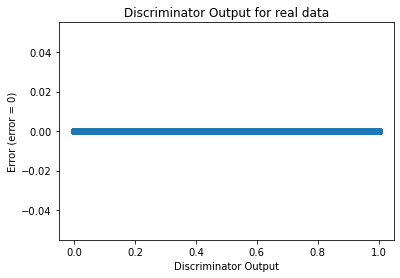

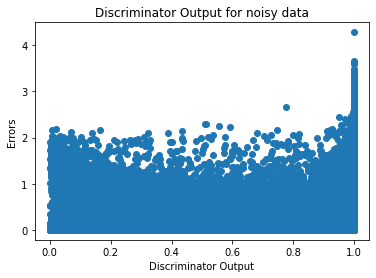

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)